# Problem statement
Understanding defaulter of banking in advance can mitimize huge risk of a bank. Identifying defaulter and not approving their credit at the same time approving credit for the good customer will help bank to minimise risk and get good customer satisfaction. Given huge data for bank customers a predictive model should be build

# Import libraries and File

In [28]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import re
from sklearn.cross_validation import train_test_split  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix,roc_curve, auc, log_loss 
from sklearn.utils import resample 
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import KFold 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [2]:
# Import dataset
dataset=pd.read_table("datanew.txt",sep="\t")

# Basic statistics of Data
238 int n float
8 object
so these objects has to be changed correctly

In [29]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128557 entries, 0 to 128556
Columns: 246 entries, LE_UNIT_MASTER to MAN_LE_MAX_ODD_5000_LOAN_MOR_11
dtypes: float64(236), int64(2), object(8)
memory usage: 241.3+ MB
None


In [5]:
dataset.sample(2)

,LE_UNIT_MASTER,RUN_TS,SAMPLE_CODE,MI_LE_SCOREDATA_LOAN_ACC_EXPOSUR,MI_LE_SCOREDATA_TRANS_ACC_EXPOSU,MI_LE_SCOREDATA_NONFEBOS_EXPOSUR,MI_LE_SCOREDATA_NONFEBOS_NORDANI,R_NEW_B_TYPE,scoredata_available,flag_for_df,...,MAN_LE_MAX_ODD_500_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_3,MAN_LE_MAX_ODD_1000_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_2,MAN_LE_MAX_ODD_500_LOAN_MOR_1,MAN_LE_MAX_ODD_1000_LOAN_MOR_1,MAN_LE_MAX_ODD_2500_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_12,MAN_LE_MAX_ODD_5000_LOAN_MOR_11
15955,15013397,2012-02-04 22:39:43.0992030,Development Sample,NaN,-800000.0,NaN,NaN,B_SC_1,mix,Mix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,9004242413,2012-06-02 13:45:23.2386490,Development Sample,NaN,0.0,NaN,NaN,B_SC_7,mix,Mix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.describe(include='all')

,LE_UNIT_MASTER,RUN_TS,SAMPLE_CODE,MI_LE_SCOREDATA_LOAN_ACC_EXPOSUR,MI_LE_SCOREDATA_TRANS_ACC_EXPOSU,MI_LE_SCOREDATA_NONFEBOS_EXPOSUR,MI_LE_SCOREDATA_NONFEBOS_NORDANI,R_NEW_B_TYPE,scoredata_available,flag_for_df,...,MAN_LE_MAX_ODD_500_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_3,MAN_LE_MAX_ODD_1000_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_2,MAN_LE_MAX_ODD_500_LOAN_MOR_1,MAN_LE_MAX_ODD_1000_LOAN_MOR_1,MAN_LE_MAX_ODD_2500_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_12,MAN_LE_MAX_ODD_5000_LOAN_MOR_11
count,1.285570e+05,128557,128557,1.848400e+04,9.869900e+04,2.957700e+04,3.196200e+04,128557,128557,128557,...,1437.000000,1157.000000,1420.000000,1120.000000,863.000000,844.000000,775.000000,635.000000,953.000000,946.000000
unique,NaN,36,1,NaN,NaN,NaN,NaN,6,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-04-06 05:09:04.4659670,Development Sample,NaN,NaN,NaN,NaN,B_SC_1,mix,Mix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4116,128557,NaN,NaN,NaN,NaN,47332,72356,96601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.716518e+09,NaN,NaN,-8.654406e+05,-1.476335e+06,-4.217544e+06,-3.148100e+05,NaN,NaN,NaN,...,10.675017,9.963699,10.433099,10.788393,9.850521,9.312796,9.556129,10.143307,12.651626,11.626850
std,4.333922e+09,NaN,NaN,3.240112e+06,3.347964e+08,5.819956e+07,6.292908e+05,NaN,NaN,NaN,...,23.130296,21.380036,20.379152,21.376677,23.009070,17.063048,17.479826,18.506711,36.493817,33.236419
min,1.000171e+07,NaN,NaN,-3.879217e+08,-1.051320e+11,-3.474256e+09,-2.799764e+07,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.146817e+07,NaN,NaN,-1.072990e+06,-3.000000e+05,-8.000000e+05,-3.042391e+05,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,9.005287e+09,NaN,NaN,-4.327271e+05,-6.267000e+04,-3.030000e+05,-1.041002e+05,NaN,NaN,NaN,...,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000
75%,9.017863e+09,NaN,NaN,-1.587896e+05,0.000000e+00,-1.421142e+05,-2.721632e+04,NaN,NaN,NaN,...,11.000000,10.000000,11.000000,11.000000,6.000000,6.000000,7.000000,8.000000,9.000000,10.000000


In [7]:
dataset.describe(include=['O'])

,RUN_TS,SAMPLE_CODE,R_NEW_B_TYPE,scoredata_available,flag_for_df,MI_KNID_COUNTRY_OF_REGISTRATION,MAN_LE_LPS_BEH,MAN_LE_LPS_FAS
count,128557,128557,128557,128557,128557,128178,128557,128557
unique,36,1,6,7,2,6,4,3
top,2014-04-06 05:09:04.4659670,Development Sample,B_SC_1,mix,Mix,DK,No BEH Event,No FAS Event
freq,4116,128557,47332,72356,96601,58975,120780,121860


# Reducing size of data/ Preprocessing
#### Sometimes there are more than 1 row for one customer id we can take latest one. For one customer lets arrange first record as default and then sort with timestamp

In [3]:
clean=dataset.sort_values(['LE_UNIT_MASTER','default_total','RUN_TS'],ascending=[True,False,False])
clean=clean.drop_duplicates(subset="LE_UNIT_MASTER",keep="first")
print('new shape of data',clean.shape)

new shape of data (69228, 246)


So new data is reduced to almost half
Default and non default in original and clean dataset are almost equal as once customer is default his old records are neglected but still 44 default data are neglected. Could be some are duplicate default for one customer 2 default records. Its ok to reject those 

In [9]:
print('original dataset default count \n',dataset['default_total'].value_counts())
print('clean dataset default count \n',clean['default_total'].value_counts())

original dataset default count 
 0    126528
1      2029
Name: default_total, dtype: int64
clean dataset default count 
 0    67241
1     1987
Name: default_total, dtype: int64


bacause of , in file numerical variables are considered as object so convert , to .
Its difficult to change in pandas so its changed in data.txt file

In [13]:
#clean.loc[clean['LE_UNIT_MASTER']==9009314854]
#clean['MI_LE_SCOREDATA_TRANS_ACC_EXPOSU']=clean['MI_LE_SCOREDATA_TRANS_ACC_EXPOSU'].replace(r',','.').astype('float')
#clean.loc[clean['LE_UNIT_MASTER']==9009314854]
# check all the columns with type=O
#clean.describe(include=['O'])


#### Drop 2 variables RUN_TS and SAMPLE_CODE

In [4]:
clean=clean.drop('RUN_TS',axis=1)
clean=clean.drop('SAMPLE_CODE',axis=1)

#### label encoding for catagorigal variables

In [5]:
#Onehot coding for catagorigal variables
clean['R_NEW_B_TYPE'].value_counts()

def change(code):
    if code=='B_SC_1':
        return 1
    elif code=='B_SC_13':
        return 2
    elif code=='B_SC_7':
        return 3
    elif code=='B_SC_RD_SME':
        return 4
    elif code=='B_SC_5':
        return 5
    else :
        return 6
    
onehot=pd.get_dummies(clean['R_NEW_B_TYPE'])    
#clean['R_NEW_B_TYPE'] =clean['R_NEW_B_TYPE'].apply(change) #this is label coding
clean=clean.drop('R_NEW_B_TYPE',axis=1)
clean=clean.join(onehot)
#clean['R_NEW_B_TYPE'].value_counts() 
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69228 entries, 110925 to 104125
Columns: 249 entries, LE_UNIT_MASTER to B_SC_RD_SME
dtypes: float64(236), int64(2), object(5), uint8(6)
memory usage: 131.8+ MB


In [6]:
print(clean['scoredata_available'].value_counts())
def change(code):
    if code=='mix':
        return 1
    elif code=='trans_acc':
        return 2
    elif code=='Nordania':
        return 3
    elif code=='RD':
        return 4
    elif code=='non-febos':
        return 5
    elif code=='cards':
        return 6
    else :
        return 7
    
#clean['scoredata_available'] =clean['scoredata_available'].apply(change)
#print(clean['scoredata_available'].value_counts())
onehot=pd.get_dummies(clean['scoredata_available'])
clean=clean.drop('scoredata_available',axis=1)
clean=clean.join(onehot)
clean.info()

mix          37296
trans_acc    17075
Nordania      9712
RD            3442
non-febos     1120
cards          305
loan_acc       278
Name: scoredata_available, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69228 entries, 110925 to 104125
Columns: 255 entries, LE_UNIT_MASTER to trans_acc
dtypes: float64(236), int64(2), object(4), uint8(13)
memory usage: 131.7+ MB


In [7]:
print(clean['flag_for_df'].value_counts())
def change(code):
    if code=='Mix':
        return 1
    else :
        return 2

onehot=pd.get_dummies(clean['flag_for_df'])
clean=clean.drop('flag_for_df',axis=1)
clean=clean.join(onehot)

#clean['flag_for_df'] =clean['flag_for_df'].apply(change)
#print(clean['flag_for_df'].value_counts())


Mix    49154
DF     20074
Name: flag_for_df, dtype: int64


In [8]:
print(clean['MI_KNID_COUNTRY_OF_REGISTRATION'].value_counts())
def change(code):
    if code=='DK':
        return 1
    elif code=='FI':
        return 2
    elif code=='SE':
        return 3
    elif code=='GB':
        return 4
    elif code=='NO':
        return 5
    else :
        return 6
    
clean['MI_KNID_COUNTRY_OF_REGISTRATION'] =clean['MI_KNID_COUNTRY_OF_REGISTRATION'].apply(change)
print(clean['MI_KNID_COUNTRY_OF_REGISTRATION'].value_counts())



DK    30341
FI    16332
SE    15328
GB     3424
NO     3415
IE        9
Name: MI_KNID_COUNTRY_OF_REGISTRATION, dtype: int64
1    30341
2    16332
3    15328
4     3424
5     3415
6      388
Name: MI_KNID_COUNTRY_OF_REGISTRATION, dtype: int64


In [9]:
print(clean['MAN_LE_LPS_BEH'].value_counts())
def change(code):
    if code=='No BEH Event':
        return 1
    elif code=='Non-severe':
        return 2
    elif code=='OEI':
        return 3
    else :
        return 4
    
clean['MAN_LE_LPS_BEH'] =clean['MAN_LE_LPS_BEH'].apply(change)
print(clean['MAN_LE_LPS_BEH'].value_counts())


No BEH Event    64681
Non-severe       3691
OEI               490
Severe            366
Name: MAN_LE_LPS_BEH, dtype: int64
1    64681
2     3691
3      490
4      366
Name: MAN_LE_LPS_BEH, dtype: int64


In [10]:
print(clean['MAN_LE_LPS_FAS'].value_counts())

      
def change(code):
    if code=='No FAS Event':
        return 1
    elif code=='FAS Non-OEI Event':
        return 2
    else :
        return 3
    
clean['MAN_LE_LPS_FAS'] =clean['MAN_LE_LPS_FAS'].apply(change)
print(clean['MAN_LE_LPS_FAS'].value_counts())


No FAS Event         65395
FAS Non-OEI Event     2817
FAS OEI Event         1016
Name: MAN_LE_LPS_FAS, dtype: int64
1    65395
2     2817
3     1016
Name: MAN_LE_LPS_FAS, dtype: int64


In [11]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69228 entries, 110925 to 104125
Columns: 256 entries, LE_UNIT_MASTER to Mix
dtypes: float64(236), int64(5), uint8(15)
memory usage: 131.3 MB


So now all columns are integer of catagorigal. Its time to impute some value for NaN
Check for missing values.
When any column has more than 60% NaN values we can drop those

For catagorical NaN values replace with median and for numeric with mean

Remove outliners with .95 quartile 

Do normalization of numeric variables

#### drop variables with more than 60% NA value


In [12]:
l=clean.columns

j=0
for i in l:
    if (clean[i].isnull().sum()/clean.shape[0] > .6):
        j+=1
        print("this column has high NaN values",i,clean[i].isnull().sum())
        clean=clean.drop(i,axis=1)
        
print('New shape after dropping',j,clean.shape)        

this column has high NaN values MI_LE_SCOREDATA_LOAN_ACC_EXPOSUR 60077
this column has high NaN values MI_LE_SCOREDATA_NONFEBOS_EXPOSUR 53942
this column has high NaN values MI_LE_SCOREDATA_NONFEBOS_NORDANI 49149
this column has high NaN values MAN_LE_REMINDER_FEBOS_SEVERITY_1 65173
this column has high NaN values MAN_LE_REMINDER_ALL_ACC_SEVERITY 67395
this column has high NaN values MAN_LE_REMINDER_FEBOS_SEVERITY_2 67962
this column has high NaN values MAN_IND_GROUP_MEMB_SCOREDATA_ALL 41836
this column has high NaN values MAN_LE_REMINDER_LOAN_ACC_SEVERIT 68434
this column has high NaN values MAN_LE_MAX_REMINDER_TREND_1_4_VS 64203
this column has high NaN values MAN_LE_REMINDER_ACCOUNTS_SEVERIT 65754
this column has high NaN values MAN_LE_SCOREDATA_TRANS_ACC_UTILI 43926
this column has high NaN values MAN_LE_ODD_500_W_SUM_TOTAL_SIMPL 54844
this column has high NaN values MAN_LE_ODD_1000_W_SUM_TOTAL_SIMP 55703
this column has high NaN values MAN_LE_ODD_500_W_MAX_TOTAL_SIMPL 54844
this c

#### inpute mean value in NaN
#### handle outliner change >5sigma to max value and <5sigma to min value for numeric data
#### normalize only numeric columns
#### 2 dictionaries are created here for taking care of test data minmax and missing

col with catagorigal value filled with median MAN_LE_REMINDER_SEVERITY_1_COUNT
col with catagorigal value filled with median MAN_LE_REMINDER_SEVERITY_2_COUNT
col with catagorigal value filled with median MAN_LE_REMINDER_SEVERITY_3_COUNT
col with catagorigal value filled with median MAN_LE_MAX_REMINDER_SEVERITY_MTH
col with catagorigal value filled with median MAN_CP_CONFIDENTIAL_FLAG
col with catagorigal value filled with median MAN_CP_NUMBER_OF_AUDITO
col with catagorigal value filled with median MAN_FAS_Positive_EBITDA_EBIT_EBT
col with catagorigal value filled with median MAN_FAS_Positive_FCF_1_2_3
Index(['LE_UNIT_MASTER', 'MI_LE_SCOREDATA_TRANS_ACC_EXPOSU', 'default_total',
       'MAN_LE_REMINDER_SEVERITY_1_COUNT', 'MAN_LE_REMINDER_SEVERITY_2_COUNT',
       'MAN_LE_REMINDER_SEVERITY_3_COUNT', 'MI_KNID_COUNTRY_OF_REGISTRATION',
       'MAN_LE_COMBINED_REMINDER_1_12', 'MAN_LE_MAX_REMINDER_SEVERITY_MTH',
       'MAN_LE_SCOREDATA_TRANS_CARDS_UTI',
       ...
       'B_SC_RD_SME', 'Nor

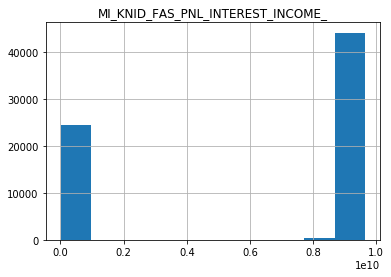

In [13]:

#But we have to be careful here for catagorycal we have to impute most common and for numeric mean

l=clean.columns
missing={}
j=0
for i in l:
    if (clean[i].isnull().sum()>0):
        j+=1
        #If there are less than 15 values then we can consider it as catagorical
        
        if (clean[i].value_counts().shape[0]<15):#catagorigal variable
            #df["value"] = df.groupby("name").transform(lambda x: x.fillna(x.mean()))
            clean[i]=clean.groupby('default_total').transform(lambda x: x.fillna(x.median()))
            
            #clean[i].fillna(clean[i].median(),inplace=True)
            missing[i] = clean[i].groupby('default_total').median()

            print('col with catagorigal value filled with median',i,clean[i].groupby('default_total').median())
        else:    #numeric variables
           #print("this column has high NaN values ",i,clean[i].isnull().sum())
           clean[i]=clean.groupby('default_total').transform(lambda x: x.fillna(x.mean()))
            print('col with numeric value filled with mean',i,clean[i].groupby('default_total').mean())
           #clean[i].fillna(clean[i].mean(),inplace=True)
           missing[i] = clean[i].groupby('default_total').mean()
        #print("this column has high NaN values",i,clean[i].isnull().sum())
         
        
        

clean.hist(column="MI_KNID_FAS_PNL_INTEREST_INCOME_",bins=10)


#beow not working for replacing outliner****
#down_quantiles = clean.quantile(0.05)
#up_quantiles = clean.quantile(0.95)
#outliers_low = (clean < down_quantiles)
#clean.mask(outliers_low, down_quantiles, axis=1)  
#outliers_low = (clean > up_quantiles)
#clean=clean.mask(outliers_low, up_quantiles, axis=1)  

l=clean.columns

j=0
for i in l:
        j+=1
        #If there are less than 15 values then we can consider it as catagorical
        
        if (clean[i].value_counts().shape[0]>15):#numeric
             down_quantiles = clean[i].quantile(0.05)
             up_quantiles = clean[i].quantile(0.95)
             outliers_low = (clean[i] < down_quantiles)
             clean[i]= clean[i].mask(outliers_low, down_quantiles)  
             outliers_low1 = (clean[i] > up_quantiles)
             clean[i]=clean[i].mask(outliers_low1, up_quantiles)
 
            
      
#clean['LE_UNIT_MASTER']=clean['LE_UNIT_MASTER'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
#test for Nan
j=0
for i in l:
    if (clean[i].isnull().sum()>0):
        j+=1
        print("this column has high NaN values",i,clean[i].isnull().sum())

        
        
columns=clean.columns.values.tolist()
print(clean.columns)
#normalize whole data but visualizing is not good with it maybe only for numerical normalizing is required
#xx=clean.values
#min_max_scaler=preprocessing.MinMaxScaler()
#xx_scaled=min_max_scaler.fit_transform(xx)
#clean=pd.DataFrame(xx_scaled)
#print(clean.shape)
#clean.columns=columns


minmax={}
j=0
for i in l:
        if (clean[i].value_counts().shape[0]>15):#numeric variable
          clean[i] = (clean[i] - clean[i].mean()) / (clean[i].max() - clean[i].min())
          minmax[i]={'mean':clean[i].mean(),'max':clean[i].max(),'min':clean[i].min()}


#print(clean.head(5))
#print(clean['MI_KNID_FAS_PNL_INTEREST_INCOME_'].describe())
print(clean.shape)
#print(clean.columns)
#j=0
#for i in l:
#        if (clean[i].value_counts().shape[0]>15):#numeric variable
#            print("this column has high NaN values ",i,clean[i].isnull().sum())
            #clean[i].apply(normalize,axis=1)
           #clean[i].fillna(clean[i].mean(),inplace=True)
            #clean[i]=min_max_scaler.fit_transform(clean[i])
        #print("this column has high NaN values",i,clean[i].isnull().sum())


#### find variable importance by applying a model

In [14]:
clean_x=clean.drop("default_total",axis=1)
clean_y=clean["default_total"]
model=LogisticRegression()

In [15]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
#increase sample size to get important variables correctly
#clean_x,clean_y=make_classification(n_samples=60000,n_features=128,n_classes=2,random_state=0)
#forest=ExtraTreesClassifier(n_estimators=200,random_state=0)
#forest.fit(clean_x,clean_y)
#importance=forest.feature_importances_
#indices=np.argsort(importance)[::-1]
#for f in range(clean_x.shape[1]):
    #print("%d. feature %d (%f))"%(f+1,indices[f],importance[indices[f]]))
    

#The above selection is not working so try different one
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model = ExtraTreesClassifier()
model.fit(clean_x.values, clean_y.values)
print(model.feature_importances_)
print(type(model.feature_importances_))

print((-model.feature_importances_).argsort()[:128])
indeximportance=(-model.feature_importances_).argsort()[:128]

[0.00666698 0.00651362 0.00610931 0.00649183 0.00620715 0.00392012
 0.00651868 0.00716535 0.00637536 0.00629488 0.00545277 0.00607763
 0.00624645 0.00611578 0.00657636 0.00651111 0.00619445 0.00681626
 0.00647684 0.0068246  0.00622981 0.00627757 0.00555102 0.00654857
 0.00705894 0.0067844  0.00639596 0.00645871 0.00560034 0.00590889
 0.00647582 0.00644825 0.03594407 0.02977666 0.03480712 0.04779799
 0.00603197 0.00708337 0.00636448 0.00575851 0.0069785  0.0069039
 0.00675529 0.00661153 0.00618225 0.00625147 0.0057916  0.00561472
 0.00578    0.00647671 0.00662217 0.00617    0.00665214 0.00625004
 0.00646606 0.00609225 0.00658813 0.00606385 0.00703891 0.00603434
 0.00641258 0.00637737 0.00600248 0.00597519 0.00653804 0.00626781
 0.0061414  0.00623206 0.00607391 0.00657454 0.00577183 0.00571114
 0.0066702  0.00633785 0.00675627 0.00665512 0.00615992 0.0071438
 0.0060748  0.00636229 0.0061792  0.00614685 0.00583569 0.00637469
 0.00627401 0.00656105 0.00605475 0.00653684 0.00645035 0.006026

In [16]:
#Check important feature with corelation value
clean_x_columns=clean_x.columns
for i in range(128):
  print('important column rank ',i,' is ',clean_x_columns[indeximportance[i]],' with importance ',model.feature_importances_[indeximportance[i]])

important column rank  0  is  MAN_LE_LPS_BEH  with importance  0.047797989324691606
important column rank  1  is  MAN_LE_LPS_FAS  with importance  0.04217976701032949
important column rank  2  is  MAN_LE_TREND_ODD_500_TOTAL_0_4vs  with importance  0.03594406584738194
important column rank  3  is  MAN_LE_TREND_ODD_2500_TOTAL_0_4v  with importance  0.034807122169841345
important column rank  4  is  MAN_LE_TREND_ODD_1000_TOTAL_0_4v  with importance  0.02977666405293859
important column rank  5  is  mix  with importance  0.013432777096418057
important column rank  6  is  trans_acc  with importance  0.01056637773946972
important column rank  7  is  DF  with importance  0.009565732418525937
important column rank  8  is  Mix  with importance  0.008042038268688195
important column rank  9  is  MAN_LE_MAX_REMINDER_SEVERITY_MTH  with importance  0.007165352863752306
important column rank  10  is  MAN_FAS_Positive_EBITDA_EBIT_EBT  with importance  0.007143802414585856
important column rank  11  i

important column rank  82  is  MAN_FAS_SOLVENCY_RATIO  with importance  0.006182248280221783
important column rank  83  is  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  with importance  0.006179195926883827
important column rank  84  is  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  with importance  0.006169999180313253
important column rank  85  is  MAN_FAS_EARNINGS_QUALITY_1  with importance  0.006159923101533356
important column rank  86  is  MAN_KNID_FAS_CSH_TAXES_PAID_STDE  with importance  0.006146851594619395
important column rank  87  is  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  with importance  0.006144781115190633
important column rank  88  is  MAN_KNID_FAS_PNL_INTEREST_INCOME  with importance  0.0061430019294142265
important column rank  89  is  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  with importance  0.006141400370446108
important column rank  90  is  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  with importance  0.006115778029726798
important column rank  91  is  MAN_LE_REMINDER_SEVERITY_1_COUNT  with importance  0.0061

In [17]:
#check corelated variables for top 128 columns
selected_columns=[]
for i in range(120):
    selected_columns.append(clean_x_columns[indeximportance[i]])
    print('TYPE OF COLUMNS',clean_x_columns[indeximportance[i]],clean_x[clean_x_columns[indeximportance[i]]].dtype)
print('selected columns',selected_columns)  


  

TYPE OF COLUMNS MAN_LE_LPS_BEH int64
TYPE OF COLUMNS MAN_LE_LPS_FAS int64
TYPE OF COLUMNS MAN_LE_TREND_ODD_500_TOTAL_0_4vs float64
TYPE OF COLUMNS MAN_LE_TREND_ODD_2500_TOTAL_0_4v float64
TYPE OF COLUMNS MAN_LE_TREND_ODD_1000_TOTAL_0_4v float64
TYPE OF COLUMNS mix uint8
TYPE OF COLUMNS trans_acc uint8
TYPE OF COLUMNS DF uint8
TYPE OF COLUMNS Mix uint8
TYPE OF COLUMNS MAN_LE_MAX_REMINDER_SEVERITY_MTH float64
TYPE OF COLUMNS MAN_FAS_Positive_EBITDA_EBIT_EBT float64
TYPE OF COLUMNS MI_KNID_FAS_RAT_CURRENT_VALUE_1 float64
TYPE OF COLUMNS MI_KNID_FAS_ASS_TOT_CURRENT_ASSE float64
TYPE OF COLUMNS MAN_FAS_GEAR_RT_EQUITY_LIABILITY float64
TYPE OF COLUMNS MI_KNID_FAS_LIA_TOT_LONG_TERM_DE float64
TYPE OF COLUMNS MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 float64
TYPE OF COLUMNS MAN_KNID_FAS_TURNOVER_AMT_STDEV_ float64
TYPE OF COLUMNS MAN_FAS_GEAR_RT_CURRENT_ASSETS_L float64
TYPE OF COLUMNS MI_KNID_FAS_LIA_RESERVES_VALUE_1 float64
TYPE OF COLUMNS MI_KNID_FAS_LIA_EQT_VALUE_1 float64
TYPE OF COLUMNS MAN_KNID_


So lets check the corelations of top 20 features from above and we will try to make model using those 

#### find corelation of variables by VIF

In [18]:
#find corelations
for i in selected_columns:
    for j in selected_columns:
        if (i==j):
            continue
        else:
            if clean_x[i].corr(clean_x[j])>.8:
               print('corelation between ',i,j," : ",clean_x[i].corr(clean_x[j]))
temp=clean_x[selected_columns]
temp.corr()


corelation between  MAN_LE_TREND_ODD_500_TOTAL_0_4vs MAN_LE_TREND_ODD_1000_TOTAL_0_4v  :  0.9467474748188668
corelation between  MAN_LE_TREND_ODD_1000_TOTAL_0_4v MAN_LE_TREND_ODD_500_TOTAL_0_4vs  :  0.9467474748188669
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_LE_MAX_

corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MAN_LE_MAX_REMINDER_SEVERITY_MTH MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_FAS_Positive_EBITDA_EBIT_EBT MI_KNID_

corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_PNL_OTHER_

corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_KNID_FAS_CSH_CASH_FLOW_INV_A  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CURRENT_ASSE MAN_LE_SCORE

corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_LIABILITY MAN_KNID_FAS_

corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_KNID_FAS_CSH_CASH_FLOW_INV_A  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MI_KNID_FAS_CSH_TAXES_PAID_VALUE  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_FAS_PROF_RT_EBIT_EQUITY_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LONG_TERM_DE MAN_KNID_FAS_RA

corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_KNID_FAS_CSH_CASH_FLOW_INV_A  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MI_KNID_FAS_CSH_TAXES_PAID_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_FAS_PROF_RT_EBIT_EQUITY_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_KNID_FAS_RAT_INTEREST_STDEV_  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MI_KNID_FAS_LIA_EQT_SHARE_VALUE_  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8 LE_UNIT_MAST

corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_FAS_PROF_RT_EBIT_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_KNID_FAS_RAT_INTEREST_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MI_KNID_FAS_LIA_EQT_SHARE_VALUE_  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ LE_UNIT_MASTER  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_STDEV_ MAN_KNID_FAS_RAT_SOLVENCY_DELTA

corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_ASSETS_L MAN_LE_SCO

corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MI_KNID_FAS_LIA_RESERVES_VALUE_1 MAN_CP_CON

corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_VALUE_1 MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MI_KN

corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_KNID_FAS_RAT_INTEREST_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MI_KNID_FAS_LIA_EQT_SHARE_VALUE_  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS LE_UNIT_MASTER  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_KNID_FAS_PNL_OTHER_FIXED_COS MAN_LE_CUSTINFRA_INDUSTRY_CO

corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_KNID_FAS_CSH_CASH_FLOW_INV_A  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MI_KNID_FAS_CSH_TAXES_PAID_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1 MAN_FAS_PROF

corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MI_KNID_

corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_FLOW_INV_A MI_KNID_

corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MI_KNID_

corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8 MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MI_KNID

corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_CSH_TAXES_PAID_VALUE MAN_FAS_DEBT_

corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_FAS_PROF_RT_EBIT_EQUITY_1 MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corel

corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_STDEV_ MAN_FAS_

corelation between  MI_KNID_FAS_LIA_EQT_SHARE_VALUE_ MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_SHARE_VALUE_ MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_SHARE_VALUE_ MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_SHARE_VALUE_ MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_SHARE_VALUE_ MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI_KNID_FAS_LIA_EQT_SHARE_VALUE_ MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_KNID_FAS_CSH_CHANGE_CASH_AND MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_KNID_FAS_CSH_CHANGE_CASH_AND MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_KNID_FAS_CSH_CHANGE_CASH_AND MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_CSH_CHANGE_CASH_AND MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_KNID_FAS_CSH_CHANGE_CASH_AND MAN_FAS_

corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TURNOVER_1 MI_KNID_FAS_LIA_EQT_VALUE_1  :

corelation between  LE_UNIT_MASTER MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  LE_UNIT_MASTER MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  LE_UNIT_MASTER MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  LE_UNIT_MASTER MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  LE_UNIT_MASTER MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  LE_UNIT_MASTER MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  LE_UNIT_MASTER MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  LE_UNIT_MASTER MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  LE_UNIT_MASTER MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  LE_UNIT_MASTER MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  LE_UNIT_MASTER MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  LE_UNIT_MASTER MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  LE_UNIT_MASTER MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between

corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_KNID_FAS_CSH_CASH_AND_EQUIV_ MAN_LE_SCO

corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1 MAN_LE_SCO

corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I MAN_KNID_F

corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_PROF_RT_EBITDA_EQUITY_1 MAN_KNID_FAS_LIA_EQT_

corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_DELTA_ MAN_CP_CON

corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_LE_CUSTINFRA_INDUSTRY_CODE_E MAN_CP_CON

corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_CP_NUMBER_OF_AUDITO  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_FAS_RAT_SOLVENCY_EXCL_INTANG  :  1.0
corelation between  MAN_KNID_FAS_RAT_SOLVENCY_STDEV_ MAN_FAS_CSH_GENE

corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_KNID_FAS_CSH_EBIT_DELTA_1  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_CP_NUMBER_OF_AUDITO  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MAN_FAS_DEBT_RT_CASH_FLOW_CURREN MAN_FAS_RAT_SOLVENC

corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MI_KNID_FAS_RAT_GOODWILL_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MAN_KNID_FAS_CSH_EBIT_DELTA_1  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MAN_CP_NUMBER_OF_AUDITO  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_ MI_KNID_FAS_CSH_GRO

corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_FAS_RAT_SOLVENCY_EXCL_INTANG  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_FAS_CSH_GENERATING_POWER_1  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ  :  1.0
corelation between  MAN_KNID_FAS_RT_FCF_NET_INCOME_V MAN_LE_SC

corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_KNID_FAS_CSH_EBIT_DELTA_1  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_CP_NUMBER_OF_AUDITO  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_ MAN_FAS_ACTIVITY_RT

corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_CP_CONFIDENTIAL_FLAG  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MI_KNID_FAS_RAT_GOODWILL_VALUE_1  :  1.0
corelation between  MAN_LE_COMBINED_REMINDER_1_12 MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T  :  1.0
corelat

corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MAN_CP_CONFIDENTIAL_FLAG  :  1.0
corelation between  MI_LE_SCOREDATA_TRANS_ACC_EXPOSU MI_KNID_FAS_RAT_BA

corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MAN_CP_CONFIDENTIAL_FLAG  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 MI_KNID_FAS_RAT_BA

corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_DELTA MAN_CP_CON

corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_2_COUNT MAN_KNID_F

corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_LE_SCOREDATA_RISK_ACC_OLDEST MAN_FAS_

corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB MAN_LE_SCORE

corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MAN_CP_CONFIDENTIAL_FLAG MAN_KNID_FAS_PN

corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_KNID_FAS_

corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_FAS_

corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI_KNID_FAS_RAT_GOODWILL_VALUE_1 MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T MI_KNID

corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MAN_KNID_FAS_TURNOVER_AMT_STDEV_

corelation between  MAN_KNID_FAS_CSH_EBIT_DELTA_1 MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_CP_NUMBER_OF_AUDITO MI_KNID_FAS_LIA_

corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y MAN_LE_SCORE

corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_KNID_FAS

corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_FIXED_ASSETS MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MI_KNID_

corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MAN_FAS_RAT_NET_CURRENT_ASSETS_V MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MI_KNID_

corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_INTANGIBLE_A MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MI_KNID_

corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_FAS

corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_CSH_GROSS_CASH_FLOW_ MAN_KNID

corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_CARDS_UTI MAN_KNID_FAS_L

corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_ACC_PAYABLES MAN_KNID_FAS_L

corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_FAS_RAT_SOLVENCY_EXCL_INTANG MAN_FAS

corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_LE_REMINDER_SEVERITY_3_COUNT  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_FAS_SOLVENCY_RATIO  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_FAS_EARNINGS_QUALITY_1  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_KNID_FAS_CSH_TAXES_PAID_STDE  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  :  1.0
corelation between  MAN_FAS_CSH_GENERATING_POWER_1 MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
core

corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_FAS_SOLVENCY_RATIO  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_FAS_EARNINGS_QUALITY_1  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_KNID_FAS_CSH_TAXES_PAID_STDE  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ MI_KNID_FAS_PNL_NET_INC

corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_LE_SCOREDATA_ALL_ACC_DISP_DE MAN_LE_SCORED

corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL MAN_LE_SCORED

corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E MAN_FAS_DEBT_

corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_STDEV MAN_KNID

corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_PNL_INTEREST_INCOME_ MAN_FAS_

corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI_KNID_FAS_RAT_BANK_DEBT_VALUE_ MAN_FAS_GEAR_RT_CURRENT_LIABILIT  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MI_KNID

corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_INTEREST_EXP MAN_FAS_

corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_PNL_EBT_VALUE_1 MAN_FAS_AGE_OF_FIN_STATEMENT_VAL  :  1.0
corelation between  MI

corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_LE_SCOREDATA_RT_AVG_DISP_DEP MAN_LE_SCORED

corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_FINANC MAN_FAS_ACTIV

corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INTEREST_INC MAN_KNI

corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_FAS_EARNINGS_QUALITY_1  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_KNID_FAS_CSH_TAXES_PAID_STDE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4 MAN_LE_SCORED

corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_3_COUNT MAN_FAS

corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_FAS_EARNINGS_QUALITY_1  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_KNID_FAS_CSH_TAXES_PAID_STDE  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 MAN_KNID_FAS_

corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MAN_KNID_FAS_RAT_BANK_DEBT_STDEV  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MI_KNID_FAS_PNL_INTEREST_INCOME_  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MI_KNID_FAS_RAT_BANK_DEBT_VALUE_  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MAN_FAS_DEBT_RT_EBT_INTEREST_EXP  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MI_KNID_FAS_PNL_EBT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MAN_LE_SCOREDATA_RT_AVG_DISP_DEP  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MI_KNID_FAS_CSH_CASH_FLOW_FINANC  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MI_KNID_FAS_PNL_NET_INTEREST_INC  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3 MAN_LE_REMIN

corelation between  MAN_FAS_SOLVENCY_RATIO MAN_KNID_FAS_RAT_BANK_DEBT_STDEV  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MI_KNID_FAS_PNL_INTEREST_INCOME_  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MI_KNID_FAS_RAT_BANK_DEBT_VALUE_  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MAN_FAS_DEBT_RT_EBT_INTEREST_EXP  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MI_KNID_FAS_PNL_EBT_VALUE_1  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MAN_LE_SCOREDATA_RT_AVG_DISP_DEP  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MI_KNID_FAS_CSH_CASH_FLOW_FINANC  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MI_KNID_FAS_PNL_NET_INTEREST_INC  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MAN_LE_REMINDER_SEVERITY_3_COUNT  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_FAS_SOLVENCY_RATIO MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3  :  1

corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MAN_KNID_FAS_RAT_BANK_DEBT_STDEV  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MI_KNID_FAS_PNL_INTEREST_INCOME_  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MI_KNID_FAS_RAT_BANK_DEBT_VALUE_  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MAN_FAS_DEBT_RT_EBT_INTEREST_EXP  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MI_KNID_FAS_PNL_EBT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MAN_LE_SCOREDATA_RT_AVG_DISP_DEP  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MI_KNID_FAS_CSH_CASH_FLOW_FINANC  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MI_KNID_FAS_PNL_NET_INTEREST_INC  :  1.0
corelation between  MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE MAN_LE_SCORE

corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_FAS_RAT_SOLVENCY_EXCL_INTANG  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_FAS_CSH_GENERATING_POWER_1  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MAN_LE_SCOREDATA_ALL_ACC_DISP_DE  :  1.0
corelation between  MAN_FAS_PROF_RT_CASH_FLOW_EQUITY MI_KNID_F

corelation between  MAN_FAS_EARNINGS_QUALITY_1 MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_CP_CONFIDENTIAL_FLAG  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MI_KNID_FAS_RAT_GOODWILL_VALUE_1  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALITY_1 MAN_KNID_FAS_CSH_EBIT_DELTA_1  :  1.0
corelation between  MAN_FAS_EARNINGS_QUALIT

corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_KNID_FAS_CSH_TAXES_PAID_STDE MAN_LE_REM

corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC LE_UNIT_MASTER  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MI_KNID_FAS_CSH_CASH_FLOW_INV_AC MAN_FAS_DEBT_RT_CASH_FLOW_CU

corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MI_KNID_FAS_LIA_EQT_SHARE_VALUE_  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME LE_UNIT_MASTER  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_KNID_FAS_PNL_INTEREST_INCOME MAN_KNID_FAS_RAT_SOLVENCY_ST

corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_LE_SCORE

corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL MAN_FAS_

corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P MAN_KNID_FAS_

corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_LE_REMINDER_SEVERITY_1_COUNT MAN_LE_SCORED

corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_LE_REMINDER_SEVERITY_3_COUNT  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_FAS_SOLVENCY_RATIO  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_FAS_EARNINGS_QUALITY_1  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_KNID_FAS_CSH_TAXES_PAID_STDE  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
corelation between  MI_KNID_FAS_PNL_NET_INCOME_VALUE MI_KNID_FAS_LIA_BANK_DE

corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_FAS_RAT_SOLVENCY_EXCL_INTANG  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_FAS_CSH_GENERATING_POWER_1  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MAN_LE_SCOREDATA_ALL_ACC_DISP_DE  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_OD_DA MI_KNID_F

corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_FAS_RAT_SOLVENCY_EXCL_INTANG  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_FAS_CSH_GENERATING_POWER_1  :  1.0
corelation between  MI_KNID_FAS_RAT_RETURN_ON_EQT_VA MAN_KNID_

corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_CP_CONFIDENTIAL_FLAG  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MI_KNID_FAS_RAT_GOODWILL_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_KNID_FAS_CSH_EBIT_DELTA_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS MAN_CP_NUMBER_OF_A

corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_LE_REMINDER_SEVERITY_2_COUNT  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_Avg_3Y MAN_LE_SCO

corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_LE_SCOREDATA_RISK_ACC_OLDEST  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_CP_CONFIDENTIAL_FLAG  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MI_KNID_FAS_RAT_GOODWILL_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_KNID_FAS_CSH_EBIT_DELTA_1  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_CP_NUMBER_OF_AUDITO  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MI_KNID_FAS_ASS_TOT_FIXED_ASSETS  :  1.0
corelation between  MAN_KNID_FAS_CSH_GROSS_CASH_FLOW MAN_FAS_RAT_NET_CURRENT_ASS

corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_PROF_RT_EBIT_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_RAT_INTEREST_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MI_KNID_FAS_LIA_EQT_SHARE_VALUE_  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 LE_UNIT_MASTER  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_VALUE_1 MAN_KNID_FAS_RAT_SOLVENCY_DELTA

corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT LE_UNIT_MASTER  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_KNID_FAS_CSH_CASH_AND_EQUIV_  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_FAS_PROF_RT_EBITDA_EQUITY_1  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_KNID_FAS_RAT_SOLVENCY_DELTA_  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT MAN_KNID_FAS_RT_FCF_NET_IN

corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MI_KNID_FAS_LIA_EQT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_KNID_FAS_PNL_OTHER_FIXED_COS  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_KNID_FAS_CSH_CASH_FLOW_INV_A  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MI_KNID_FAS_CSH_TAXES_PAID_VALUE  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_FAS_PROF_RT_EBIT_EQUITY_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MAN_KNID_FAS_RAT_INTEREST_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_RAT_INTEREST_Avg_3Y MI_KNID_FAS_LIA

corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_

corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_MOV_DIVIDEND_PAID_VA MAN_KNID

corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE  :  1.0
corelation between  MAN_KNID_FAS_RAT_CURRENT_DELTA_1 MAN_FAS_

corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_FAS_LEVERAGE_NIBD_EBIT MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_FAS_LEVE

corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_KNID_FAS_TURNOVER_GROWTH_ASS  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU  :  1.0
corelation between  MI_KNID_FAS_RAT_INVENTORY_TURNOV MAN_KNID

corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MI_KNID_FAS_CSH_CHANGE_IN_WORKIN  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MI_KNID_FAS_ASS_TOT_CASH_AND_EQU  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MAN_KNID_FAS_LIA_RESERVES_DELTA_  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MAN_FAS_GEAR_RT_EQUITY_CURRENT_L  :  1.0
corelation between  MAN_LE_SCOREDATA_TRANS_ACC_NO_CR MAN_KNID

corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N MAN_FAS

corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_FAS_ACTIVITY_RT_INVENTORY_TU MI_KNID_FAS_R

corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MI_KNID_FAS_LIA_TOT_SHORT_TERM_D MAN_FAS

corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_LE_SCOREDATA_RT_AVG_DISP_DEP  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MI_KNID_FAS_CSH_CASH_FLOW_FINANC  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MI_KNID_FAS_PNL_NET_INTEREST_INC  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_LE_REMINDER_SEVERITY_3_COUNT  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_FAS_SOLVENCY_RATIO  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_ASSETS_VALUE MAN_FAS_EARNINGS_

corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MAN_KNID_FAS_RAT_BANK_DEBT_STDEV  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MI_KNID_FAS_PNL_INTEREST_INCOME_  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MI_KNID_FAS_RAT_BANK_DEBT_VALUE_  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MAN_FAS_DEBT_RT_EBT_INTEREST_EXP  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MI_KNID_FAS_PNL_EBT_VALUE_1  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MAN_LE_SCOREDATA_RT_AVG_DISP_DEP  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MI_KNID_FAS_CSH_CASH_FLOW_FINANC  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MI_KNID_FAS_PNL_NET_INTEREST_INC  :  1.0
corelation between  MAN_FAS_DEBT_RT_EBT_LIABILITY_1 MAN_LE_SCOREDATA_CTO_TO

corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_FAS_RAT_NET_CURRENT_ASSETS_V  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MI_KNID_FAS_ASS_TOT_INTANGIBLE_A  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MI_KNID_FAS_CSH_GROSS_CASH_FLOW_  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_LE_SCOREDATA_TRANS_CARDS_UTI  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_FAS_ACTIVITY_RT_ACC_PAYABLES  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_FAS_RAT_SOLVENCY_EXCL_INTANG  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_FAS_CSH_GENERATING_POWER_1  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MAN_LE_SCOREDATA_ALL_ACC_DISP_DE  :  1.0
corelation between  MI_KNID_FAS_CSH_CHANGE_IN_WORKIN MI_KNID_F

corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MI_KNID_FAS_ASS_TOT_CASH_AND_EQU MAN_LE_REM

corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_LE_CUSTINFRA_INDUSTRY_CODE_E  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_KNID_FAS_RAT_SOLVENCY_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_FAS_DEBT_RT_CASH_FLOW_CURREN  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_KNID_FAS_RT_FCF_NET_INCOME_V  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_LE_COMBINED_REMINDER_1_12  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MI_LE_SCOREDATA_TRANS_ACC_EXPOSU  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_KNID_FAS_LIA_EQT_SHARE_DELTA  :  1.0
corelation between  MAN_KNID_FAS_LIA_RESERVES_DELTA_ MAN_LE_REM

corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_KNID_FAS_CSH_CASH_FLOW_INV_A  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MI_KNID_FAS_CSH_TAXES_PAID_VALUE  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_FAS_PROF_RT_EBIT_EQUITY_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_KNID_FAS_RAT_INTEREST_STDEV_  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MI_KNID_FAS_LIA_EQT_SHARE_VALUE_  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_KNID_FAS_CSH_CHANGE_CASH_AND  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_FAS_PROF_RT_EBT_TURNOVER_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L LE_UNIT_MASTER  :  1.0
corelation between  MAN_FAS_GEAR_RT_EQUITY_CURRENT_L MAN_KNID_FAS_CSH_CASH_AND_EQUI

corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_LE_MAX_REMINDER_SEVERITY_MTH  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_FAS_Positive_EBITDA_EBIT_EBT  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_ASS_TOT_CURRENT_ASSE  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_FAS_GEAR_RT_EQUITY_LIABILITY  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_LIA_TOT_LONG_TERM_DE  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_KNID_FAS_TURNOVER_AMT_STDEV_  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_FAS_GEAR_RT_CURRENT_ASSETS_L  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_LIA_RESERVES_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_

corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_FAS_LEVERAGE_NIBD_EBIT  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_RAT_INVENTORY_TURNOV  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_LE_SCOREDATA_TRANS_ACC_NO_CR  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_FAS_ACTIVITY_RT_INVENTORY_TU  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_LIA_TOT_SHORT_TERM_D  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_ASS_TOT_ASSETS_VALUE  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MAN_FAS_DEBT_RT_EBT_LIABILITY_1  :  1.0
corelation between  MAN_KNID_FAS_TURNOVER_GROWTH_ASS MI_KNID_FAS_CS

corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_KNID_FAS_RAT_INTEREST_Avg_3Y  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MI_KNID_FAS_MOV_DIVIDEND_PAID_VA  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_KNID_FAS_RAT_CURRENT_DELTA_1  :  1.0
corelation between  MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU MAN_FAS

corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_KNID_FAS_RAT_CURRENT_VALUE_1  :  1.0
corelation between  MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE MAN_FAS

corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_KNID_FAS_PNL_INTEREST_INCOME  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_LE_REMINDER_SEVERITY_1_COUNT  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MI_KNID_FAS_PNL_NET_INCOME_VALUE  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_LE_SCOREDATA_TRANS_ACC_OD_DA  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MI_KNID_FAS_RAT_RETURN_ON_EQT_VA  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_KNID_FAS_LIA_RESERVES_Avg_3Y  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_KNID_FAS_CSH_GROSS_CASH_FLOW  :  1.0
corelation between  MAN_FAS_AGE_OF_FIN_STATEMENT_VAL MAN_KNI

corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_LE_REMINDER_SEVERITY_3_COUNT  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_FAS_SOLVENCY_RATIO  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_FAS_PROF_RT_CASH_FLOW_EQUITY  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_FAS_EARNINGS_QUALITY_1  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_KNID_FAS_CSH_TAXES_PAID_STDE  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MI_KNID_FAS_CSH_CASH_FLOW_INV_AC  :  1.0
corelation between  MAN_FAS_GEAR_RT_CURRENT_LIABILIT MAN_KNID_FAS_PNL_INTERE

,MAN_LE_LPS_BEH,MAN_LE_LPS_FAS,MAN_LE_TREND_ODD_500_TOTAL_0_4vs,MAN_LE_TREND_ODD_2500_TOTAL_0_4v,MAN_LE_TREND_ODD_1000_TOTAL_0_4v,mix,trans_acc,DF,Mix,MAN_LE_MAX_REMINDER_SEVERITY_MTH,...,MAN_FAS_DEBT_RT_EBT_LIABILITY_1,MI_KNID_FAS_CSH_CHANGE_IN_WORKIN,MI_KNID_FAS_ASS_TOT_CASH_AND_EQU,MAN_KNID_FAS_LIA_RESERVES_DELTA_,MAN_FAS_GEAR_RT_EQUITY_CURRENT_L,MAN_KNID_FAS_TURNOVER_GROWTH_ASS,MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU,MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE,MAN_FAS_AGE_OF_FIN_STATEMENT_VAL,MAN_FAS_GEAR_RT_CURRENT_LIABILIT
MAN_LE_LPS_BEH,1.000000,0.384080,0.034410,-0.015875,0.035593,-0.013922,0.088943,-0.069633,0.069633,-0.126454,...,-0.126454,-0.126454,-0.126454,-0.126454,-0.126454,-0.126454,-0.126454,-0.126454,-0.126454,-0.126454
MAN_LE_LPS_FAS,0.384080,1.000000,0.019184,-0.027487,0.016745,-0.026617,0.076420,-0.071362,0.071362,-0.129526,...,-0.129526,-0.129526,-0.129526,-0.129526,-0.129526,-0.129526,-0.129526,-0.129526,-0.129526,-0.129526
MAN_LE_TREND_ODD_500_TOTAL_0_4vs,0.034410,0.019184,1.000000,0.757809,0.946747,-0.022429,0.080644,-0.059765,0.059765,-0.050654,...,-0.050654,-0.050654,-0.050654,-0.050654,-0.050654,-0.050654,-0.050654,-0.050654,-0.050654,-0.050654
MAN_LE_TREND_ODD_2500_TOTAL_0_4v,-0.015875,-0.027487,0.757809,1.000000,0.792802,-0.026211,0.024560,-0.002699,0.002699,-0.000782,...,-0.000782,-0.000782,-0.000782,-0.000782,-0.000782,-0.000782,-0.000782,-0.000782,-0.000782,-0.000782
MAN_LE_TREND_ODD_1000_TOTAL_0_4v,0.035593,0.016745,0.946747,0.792802,1.000000,-0.019041,0.074955,-0.058012,0.058012,-0.047373,...,-0.047373,-0.047373,-0.047373,-0.047373,-0.047373,-0.047373,-0.047373,-0.047373,-0.047373,-0.047373
mix,-0.013922,-0.026617,-0.022429,-0.026211,-0.019041,1.000000,-0.618385,-0.028910,0.028910,0.093365,...,0.093365,0.093365,0.093365,0.093365,0.093365,0.093365,0.093365,0.093365,0.093365,0.093365
trans_acc,0.088943,0.076420,0.080644,0.024560,0.074955,-0.618385,1.000000,-0.365661,0.365661,-0.424283,...,-0.424283,-0.424283,-0.424283,-0.424283,-0.424283,-0.424283,-0.424283,-0.424283,-0.424283,-0.424283
DF,-0.069633,-0.071362,-0.059765,-0.002699,-0.058012,-0.028910,-0.365661,1.000000,-1.000000,0.206979,...,0.206979,0.206979,0.206979,0.206979,0.206979,0.206979,0.206979,0.206979,0.206979,0.206979
Mix,0.069633,0.071362,0.059765,0.002699,0.058012,0.028910,0.365661,-1.000000,1.000000,-0.206979,...,-0.206979,-0.206979,-0.206979,-0.206979,-0.206979,-0.206979,-0.206979,-0.206979,-0.206979,-0.206979
MAN_LE_MAX_REMINDER_SEVERITY_MTH,-0.126454,-0.129526,-0.050654,-0.000782,-0.047373,0.093365,-0.424283,0.206979,-0.206979,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Above a lot of variables are corr=1 with other variables.
Some variables are corelated with other 50 variables. Checked in excel

#df = pd.DataFrame({'A': range(4), 'B': [2*i for i in range(4)]})
#df['A'].corr(df['B'])  #corr=1

In [19]:
#https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        #get VIF score of all variable i.e. each variables relations with remaining
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        #print('vif in iteration',vif)
        maxloc = vif.index(max(vif))
        #remove the column with max vif if this is > thresh 
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

new_df=calculate_vif_(temp,thresh=20)
selected_columns1=new_df.columns
for i in selected_columns1:
    for j in selected_columns1:
        if (i==j):
            continue
        else:
            if new_df[i].corr(new_df[j])>.8:
               print('corelation between ',i,j," : ",new_df[i].corr(new_df[j]))

dropping 'MAN_LE_MAX_REMINDER_SEVERITY_MTH' at index: 9
dropping 'MAN_FAS_Positive_EBITDA_EBIT_EBT' at index: 9
dropping 'MI_KNID_FAS_RAT_CURRENT_VALUE_1' at index: 9
dropping 'MI_KNID_FAS_ASS_TOT_CURRENT_ASSE' at index: 9
dropping 'MAN_FAS_GEAR_RT_EQUITY_LIABILITY' at index: 9
dropping 'MI_KNID_FAS_LIA_TOT_LONG_TERM_DE' at index: 9
dropping 'MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8' at index: 9
dropping 'MAN_KNID_FAS_TURNOVER_AMT_STDEV_' at index: 9
dropping 'MAN_FAS_GEAR_RT_CURRENT_ASSETS_L' at index: 9
dropping 'MI_KNID_FAS_LIA_RESERVES_VALUE_1' at index: 9
dropping 'MI_KNID_FAS_LIA_EQT_VALUE_1' at index: 9
dropping 'MAN_KNID_FAS_PNL_OTHER_FIXED_COS' at index: 9
dropping 'MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1' at index: 9
dropping 'MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T' at index: 9
dropping 'MAN_KNID_FAS_CSH_CASH_FLOW_INV_A' at index: 9
dropping 'MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8' at index: 9
dropping 'MI_KNID_FAS_CSH_TAXES_PAID_VALUE' at index: 9
dropping 'MAN_FAS_PROF_RT_EBIT_EQUITY_1' at index: 9
d

In [20]:
#above is giving columns excluding output
#clean_x=clean.drop('default_total',axis=1)
#colnames=clean_x.columns.tolist()
#If we check corelation of 81th feature with default_total it looks good so maybe its most important
#l=[81,98,96,99,100,125,19,63,75,123,37,84,77,40,43,115,94,24,8,11]
#l=[0,78,122,113,10,67,102,125,65,95,37,45,89,127,40,83,18,22,39,79]
#l=[38,25,14,17,9,118,37,31,10,35,13,20,15,11,33,30,1,32,34,36]
#for a in l:
#  print(colnames[a])
  #print(clean.corr().loc['MAN_FAS_Positive_EBITDA_EBIT_EBT','default_total'])
#  print(clean.corr().loc[colnames[a],'default_total'])



# Visualization
For all variables lets see the boxplot

Index(['MAN_LE_LPS_BEH', 'MAN_LE_LPS_FAS', 'MAN_LE_TREND_ODD_2500_TOTAL_0_4v',
       'MAN_LE_TREND_ODD_1000_TOTAL_0_4v', 'trans_acc', 'DF', 'Mix',
       'MAN_FAS_GEAR_RT_CURRENT_LIABILIT', 'default_total'],
      dtype='object')
this is catagorigal
1    64681
2     3691
3      490
4      366
Name: MAN_LE_LPS_BEH, dtype: int64


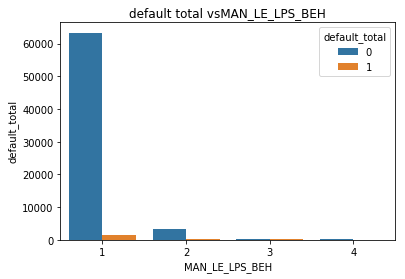

this is catagorigal
1    65395
2     2817
3     1016
Name: MAN_LE_LPS_FAS, dtype: int64


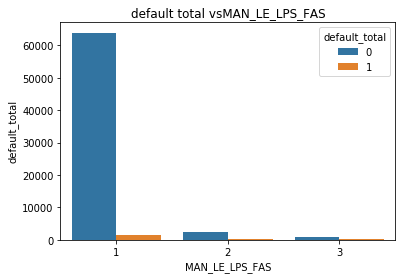

this is numerical
count    6.922800e+04
mean    -1.644230e-16
std      1.662587e-01
min     -4.971791e-01
25%      2.820915e-03
50%      2.820915e-03
75%      2.820915e-03
max      5.028209e-01
Name: MAN_LE_TREND_ODD_2500_TOTAL_0_4v, dtype: float64


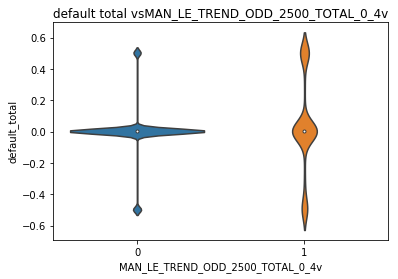

this is numerical
count    6.922800e+04
mean    -5.686446e-16
std      1.844842e-01
min     -3.532147e-01
25%     -1.988133e-02
50%     -1.988133e-02
75%     -1.988133e-02
max      6.467853e-01
Name: MAN_LE_TREND_ODD_1000_TOTAL_0_4v, dtype: float64


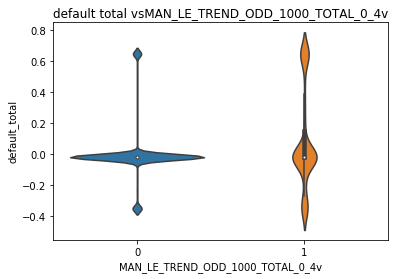

this is catagorigal
0    52153
1    17075
Name: trans_acc, dtype: int64


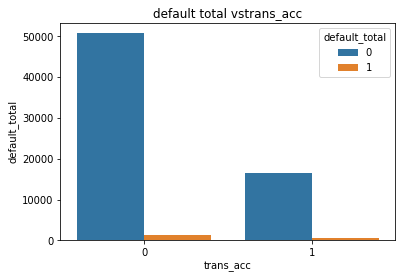

this is catagorigal
0    49154
1    20074
Name: DF, dtype: int64


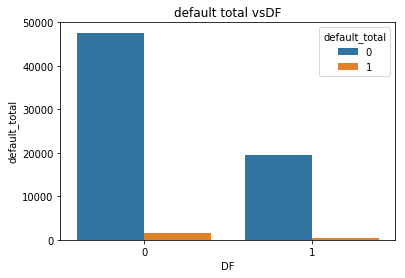

this is catagorigal
1    49154
0    20074
Name: Mix, dtype: int64


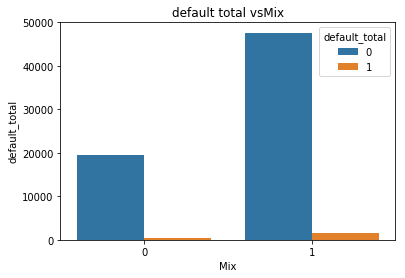

this is numerical
count    6.922800e+04
mean     7.304841e-14
std      4.764791e-01
min     -6.443997e-01
25%     -6.427202e-01
50%      3.535744e-01
75%      3.549584e-01
max      3.556003e-01
Name: MAN_FAS_GEAR_RT_CURRENT_LIABILIT, dtype: float64


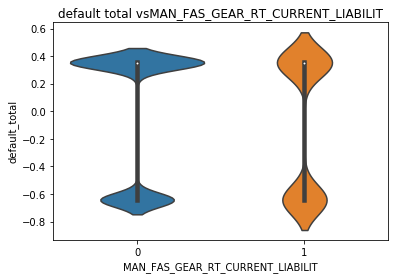

this is catagorigal
0    67241
1     1987
Name: default_total, dtype: int64


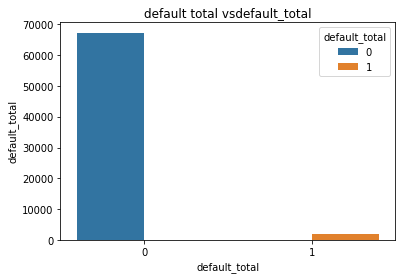

In [21]:
clean_x=new_df
clean_x=clean_x.drop(["MAN_LE_TREND_ODD_500_TOTAL_0_4vs","mix"],axis=1)
clean=clean_x.join(clean_y)
#clean_x = clean.drop('default_total',axis=1)
colnames=clean.columns

#colnames=colnames.tolist().append('default_total')
#clean=clean[colnames]
print(colnames)
for v in colnames:
  if (clean[v].value_counts().shape[0]>14):
    print('this is numerical')
    print(clean[v].describe())
    sns.violinplot(x='default_total',y=v,data=clean)
  else:
    print('this is catagorigal')
    print(clean[v].value_counts())
    sns.countplot(x=v,hue='default_total',data=clean)
  plt.title("default total vs"+v)
  plt.xlabel(v)
  plt.ylabel("default_total")  
  plt.show()

# Observation from visualization

## Split train and test

In [22]:
#Train test split
X = clean_x  #.values  
y = clean_y  #.values  
print(X.shape,y.shape,clean_y.value_counts())
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=0,stratify=y)
print(x_train.shape,y_train.shape,y_train.value_counts())
#Fit logistic regression
#classifier = LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)  
#classifier.fit(X_train, y_train)  

(69228, 8) (69228,) 0    67241
1     1987
Name: default_total, dtype: int64
(46382, 8) (46382,) 0    45051
1     1331
Name: default_total, dtype: int64


Looks like boxplot cannot be visualize without normalizing the data. So go back and do normalize for numeric variables


# Create Model with variable importance and hyperparameter tune of RF

In [33]:
# Use RF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.grid_search import GridSearchCV

n_estimators=[500,700]
class_weight=[{0: 0.1, 1: 0.9},{0: 0.2, 1: 0.8}]

tuned_parameters=dict(n_estimators=n_estimators)

model = GridSearchCV(RandomForestClassifier(),tuned_parameters, cv=5)
model.fit(x_train, y_train)


print('Best parameters \n',model.best_estimator_)
optimumn_estimators=model.best_estimator_.n_estimators

#build model with optimum parameter
model = RandomForestClassifier(n_estimators=optimumn_estimators,class_weight=model.best_estimator_.class_weight)
model.fit(x_train, y_train)

Best parameters 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Check performance of model


In [34]:
#Store scores
pred=model.predict(x_test)

mat=pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'], margins=True) 
tp=mat.iloc[1,1] ;tn=mat.iloc[0,0] ;fp=mat.iloc[0,1];fn=mat.iloc[1,0];precision=tp/(tp+fp) 
recall=tp/(tp+fn);fscoretest=2*precision*recall/(precision+recall)
print('recall of test',recall)
pred=model.predict(x_train)
mat=pd.crosstab(y_train, pred, rownames=['Actual'], colnames=['Predicted'], margins=True) 
tp=mat.iloc[1,1] ;tn=mat.iloc[0,0];fp=mat.iloc[0,1] ;fn=mat.iloc[1,0] ;precision=tp/(tp+fp);
recall=tp/(tp+fn);fscoretrain=2*precision*recall/(precision+recall)
print('recall of train',recall)

aa=pd.DataFrame({'type':['RF'],'depth':['na'],'estimator':[optimumn_estimators], \
                  'learningrate':['na'],'accuracy_train':[model.score(x_train,y_train)], \
                 'fscore_train':[fscoretrain],'accuracy_test':[model.score(x_test,y_test)],'fscore_test':[fscoretest]})
#aa=aa.append(bb)

recall of test 0.06554878048780488
recall of train 0.6859504132231405


In [86]:
recall=790/(790+541)
print(aa)

   accuracy_test  accuracy_train depth  estimator  fscore_test  fscore_train  \
0        0.96065        0.987129    na         10     0.070321      0.725769   

  learningrate type  
0           na   RF  


Train test split

Accuracy check

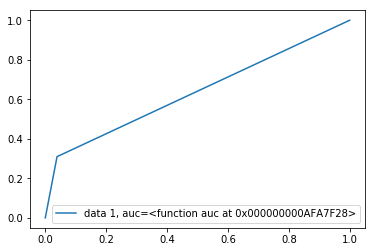

Predicted      0    1    All
True                        
0          12943  519  13462
1            265  119    384
All        13208  638  13846
F Score : 0.23287671232876714 precesion : 0.1865203761755486 Recall : 0.3098958333333333 Logloss : 1.9557139740485525 Accuracy : 0.9433771486349848


In [39]:
#accuracy check 
y_pred = classifier.predict(X_test)  
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(mat)
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)

## Use logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

# Use grid search for L2
C=[10**-3, 10**-2, 10**-1, 1,10]
penalty=['l1', 'l2']
class_weight=[{0: 0.1, 1: 0.9},{0: 0.2, 1: 0.8}]

tuned_parameters=dict(penalty=penalty,C=C,class_weight=class_weight)

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(x_train, y_train)
print('Best parameters \n',model.best_estimator_)
#print('Model test score', model.score(X_test, y_test))

optimumc=model.best_estimator_.C
optimumpenalty=model.best_estimator_.penalty

print('Best parameters \n',model.best_estimator_)
model = LogisticRegression(C=optimumc,penalty=optimumpenalty)

model.fit(x_train, y_train)
#build model with optimum parameter


Best parameters 
 LogisticRegression(C=1, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best parameters 
 LogisticRegression(C=1, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
#Store scores
pred=model.predict(x_test)

mat=pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'], margins=True) 
tp=mat.iloc[1,1] ;tn=mat.iloc[0,0] ;fp=mat.iloc[0,1];fn=mat.iloc[1,0];precision=tp/(tp+fp) 
recall=tp/(tp+fn);fscoretest=2*precision*recall/(precision+recall)
print('recall of test',recall)
pred=model.predict(x_train)
mat=pd.crosstab(y_train, pred, rownames=['Actual'], colnames=['Predicted'], margins=True) 
tp=mat.iloc[1,1] ;tn=mat.iloc[0,0];fp=mat.iloc[0,1] ;fn=mat.iloc[1,0] ;precision=tp/(tp+fp);
recall=tp/(tp+fn);fscoretrain=2*precision*recall/(precision+recall)
print('recall of train',recall)

#bb=pd.DataFrame({'type':['Logistic'],'depth':['na'],'estimator':['na], \
#                  'learningrate':['na'],'accuracy_train':[model.score(x_train,y_train)], \
#                 'fscore_train':[fscoretrain],'accuracy_test':[model.score(x_test,y_test)],'fscore_test':[fscoretest]})
#aa=aa.append(bb)

recall of test 0.01676829268292683
recall of train 0.0202854996243426


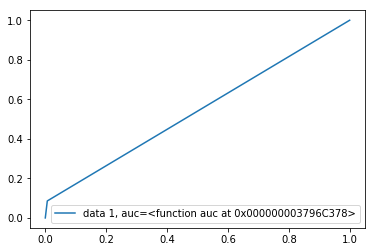

F Score : 0.13043478260869565 precesion : 0.27049180327868855 Recall : 0.0859375 Logloss : 1.0975828959939333 Accuracy : 0.9682218691318792


In [526]:
#use adaboost 
#dt = DecisionTreeClassifier()  
#try logistic with cost function and adaboost
dt= LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)

clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1) 
#Above I have used decision tree as a base estimator, any ML learner as base estimator   
#100 decision tree are used as week learner 
clf.fit(X_train,y_train) 

 
#remove unwanted variables 
#del X,dataset,dataset_pred 

 
# Predicting the Test set results  
y_pred = clf.predict(X_test)  

 
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)

Looks like model is not that good with precision only .2. Adaboost is bettre than logistic with .26 Precision score with decision tree, using logistic with cost function its increased to .27
Looks like even after adaboost with cost function model is predicting more default=0

In [527]:
print(mat)

Predicted    0.0  1.0    All
True                        
0.0        13373   89  13462
1.0          351   33    384
All        13724  122  13846


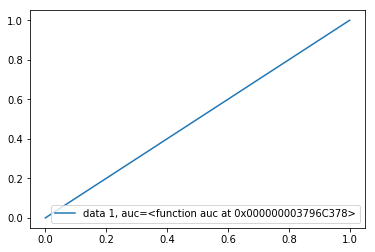

F Score : 0.05255234706445873 precesion : 0.027733641484905387 Recall : 0.5 Logloss : 0.9578860418637668 Accuracy : 0.5


In [528]:
# Try SVM
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


#dt= LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)

#clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1) 
#Above I have used decision tree as a base estimator, any ML learner as base estimator   
#100 decision tree are used as week learner 
#clf.fit(X_train,y_train) 

 
#remove unwanted variables 
#del X,dataset,dataset_pred 

 
# Predicting the Test set results  
#y_pred = clf.predict(X_test)  

 
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
print(mat)
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)

In [529]:
print(mat)

Predicted    0.0    All
True                   
0.0        13462  13462
1.0          384    384
All        13846  13846


Well the presision is not that good because the problem statement itself is complex to predict. But As adaboost with cost function is quite better this model is choosen

# Create model with important variables from visualization


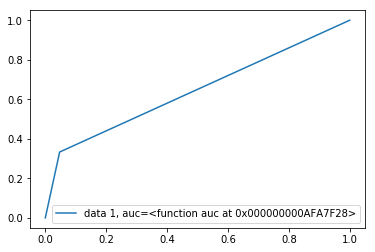

Predicted      0    1    All
True                        
0          12827  635  13462
1            256  128    384
All        13083  763  13846
F Score : 0.22319093286835223 precesion : 0.16775884665792923 Recall : 0.3333333333333333 Logloss : 2.222631627346064 Accuracy : 0.9356492849920555


In [31]:
#Lets try the variables which looks related from visualization
X = clean[['R_NEW_B_TYPE','scoredata_available','flag_for_df','MAN_LE_REMINDER_SEVERITY_1_COUNT','MAN_LE_REMINDER_SEVERITY_2_COUNT','MAN_LE_REMINDER_SEVERITY_3_COUNT','MAN_LE_COMBINED_REMINDER_1_12','MAN_LE_MAX_REMINDER_SEVERITY_MTH','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1','MAN_LE_SCOREDATA_ALL_EXPOSURE_SU','MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT','MAN_FAS_GEAR_RT_EQUITY_LIABILITY','MAN_FAS_RAT_SOLVENCY_EXCL_INTANG','MAN_FAS_GEAR_RT_CURRENT_ASSETS_L','MAN_FAS_Positive_FCF_1_2_3','MAN_LE_LPS_FAS','MI_LE_SCOREDATA_TRANS_ACC_EXPOSU','MAN_LE_SCOREDATA_TRANS_ACC_BALAN','MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E','MAN_LE_TREND_ODD_500_TOTAL_0_4vs','MAN_LE_TREND_ODD_2500_TOTAL_0_4v','MAN_FAS_GEAR_RT_EQUITY_CURRENT_L','MAN_FAS_SOLVENCY_RATIO','MAN_FAS_DEBT_RT_EBT_INTEREST_EXP','MAN_FAS_DEBT_RT_EBT_LIABILITY_1','MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB','MAN_KNID_FAS_RAT_CURRENT_VALUE_1','MAN_KNID_FAS_LIA_EQT_SHARE_DELTA','MI_KNID_FAS_RAT_CURRENT_VALUE_1','MAN_LE_SCOREDATA_ALL_ACC_DISP_DE','MAN_LE_SCOREDATA_TRANS_ACC_OD_DA','MI_KNID_COUNTRY_OF_REGISTRATION']].values  
y = clean.iloc[:, 5].values  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 
#clean.columns

#Fit logistic regression
classifier = LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(mat)
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)


In [32]:
#check training score
y_pred1 = classifier.predict(X_train)  
mat=pd.crosstab(y_train, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
#plt.legend(loc=4) 
#plt.show()  
#logloss=log_loss(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(mat)


Predicted      0     1    All
True                         
0          51294  2485  53779
1           1039   564   1603
All        52333  3049  55382


#So last model is best compare to others as recall value is more